# Thyroid Disease Detection using Deep Learning

This notebook presents a project focused on the detection of thyroid diseases using deep learning techniques. It covers data preprocessing, modeling, and evaluation to achieve effective predictions.

## Context

The dataset contains information about various thyroid conditions, including:
- Hypothyroidism and sick-euthyroid cases.
- Instances with missing values and attributes in Boolean or continuous formats.
The data originates from the Garavan Institute and related sources.

## Steps Overview

1. **Data Loading and Exploration**: Understand the dataset.
2. **Data Cleaning and Preparation**: Handle missing values and prepare features.
3. **Modeling**: Train deep learning models.
4. **Evaluation and Interpretation**: Analyze the results and evaluate the model's performance.

The most common thyroid disorder is hypothyroidism. Hypo- means deficient or under(active), so hypothyroidism is a condition in which the thyroid gland is underperforming or producing too little thyroid hormone.. Recognizing the symptoms of hypothyroidism is extremely important.

### Data Set Information:¶
From Garavan Institute\
Documentation: as given by Ross Quinlan
6 databases from the Garavan Institute in Sydney, Australia\
Approximately the following for each database:

- 2800 training (data) instances and 972 test instances
-Plenty of missing data
- 29 or so attributes, either Boolean or continuously-valued

2 additional databases, also from Ross Quinlan, are also here
- Hypothyroid.data and sick-euthyroid.data.
- Quinlan believes that these databases have been corrupted.
- Their format is highly similar to the other databases.

1 more database of 9172 instances that cover 20 classes, and a related domain theory
Another thyroid database from Stefan Aeberhard
- 3 classes, 215 instances, 5 attributes
- No missing values


## Context and Data Description

The dataset contains cases related to thyroid conditions, including hypothyroidism and sick-euthyroid states.
It includes both Boolean and continuous attributes and features missing data, which requires careful preprocessing.


We start by preprocessing the data (cleaning and prvisualisation). These steps are crucial to ensure that our data is ready to be used by a model, and they also allow us to better understand the characteristics of our dataset.

# PREPROCESSING AND CLEANING THE DATASET

In [1]:

# ==================== IMPORTATION DES BIBLIOTHÈQUES ====================

# Importation des Bibliothèques nécessaires pour la réalisation du projet
# ==================== IMPORTATION DES BIBLIOTHÈQUES ====================

# Installation de scikeras
!pip install scikeras

# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.utils import class_weight
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.feature_selection import RFE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasClassifier as SciKerasClassifier
from tensorflow.keras.optimizers import Adam
from pandas.plotting import scatter_matrix
from collections import Counter

In [2]:
# %matplotlib inline : Permet d'afficher les graphiques directement dans le notebook Jupyter.
# sns.set(...) : Configure les paramètres par défaut pour les visualisations Seaborn.


%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

## Data Loading

We start by loading the dataset. This step is crucial to understand the structure and content of the data,
which forms the foundation for all subsequent steps.


In [3]:

# Chargement des données
try:
    data = pd.read_csv('hypothyroid.csv')
    print("Données chargées avec succès.")
except FileNotFoundError:
    print("Erreur : Fichier non trouvé. Assurez-vous que le fichier 'hypothyroid.csv' est présent.")

Données chargées avec succès.


In [4]:
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


## Data Exploration

In this section, we perform exploratory data analysis (EDA) to understand the distribution, relationships,
and potential issues in the dataset. This includes visualizations and statistical summaries.


In [5]:
# Aperçu des données
print("Aperçu des premières lignes :")
print(data.head())

Aperçu des premières lignes :
  age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   

  pregnant thyroid surgery I131 treatment query hypothyroid  ... TT4 measured  \
0        f               f              f                 f  ...            t   
1        f               f              f                 f  ...            t   
2        f               f              f                 f  ...            t   
3        f               f              f                 f  ...            t   
4        f               f              f                 f  ...            t   

   TT4 T4U measured   T4U 

In [6]:

# Information sur le dataset (colonnes, types, valeurs manquantes)
print("\nInformation sur le dataset :")
print(data.info())



Information sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 n

In [7]:
# Résumé statistique des colonnes numériques
print("\nRésumé statistique :")
print(data.describe().T)



Résumé statistique :
                          count unique    top  freq
age                        3772     94     59    95
sex                        3772      3      F  2480
on thyroxine               3772      2      f  3308
query on thyroxine         3772      2      f  3722
on antithyroid medication  3772      2      f  3729
sick                       3772      2      f  3625
pregnant                   3772      2      f  3719
thyroid surgery            3772      2      f  3719
I131 treatment             3772      2      f  3713
query hypothyroid          3772      2      f  3538
query hyperthyroid         3772      2      f  3535
lithium                    3772      2      f  3754
goitre                     3772      2      f  3738
tumor                      3772      2      f  3676
hypopituitary              3772      2      f  3771
psych                      3772      2      f  3588
TSH measured               3772      2      t  3403
TSH                        3772    288    

In [8]:
# Détection des Outliers (Méthodes Z-score et IQR)
def detect_outliers(data, col):
    """ Détecte les outliers d'une colonne donnée sans les supprimer. """
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{len(outliers)} outliers détectés dans la colonne {col}.")
    return data


In [9]:

# Identifier les colonnes numèriques
numerical_cols = data.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(18, 12))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

## Data Cleaning and Preprocessing

Data cleaning involves handling missing values, outliers, and ensuring the data is in a format suitable
for modeling. These steps improve the quality and usability of the dataset.


Aperçu des premières lignes :
  age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   

  pregnant thyroid surgery I131 treatment query hypothyroid  ...   TSH  \
0        f               f              f                 f  ...   1.3   
1        f               f              f                 f  ...   4.1   
2        f               f              f                 f  ...  0.98   
3        f               f              f                 f  ...  0.16   
4        f               f              f                 f  ...  0.72   

  T3 measured   T3 TT4 measured  TT4 T4U measured   T4U FTI measured

<ipython-input-10-7b0d3b309e33>:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"t": 1, "f": 0, "M": 0, "F": 1, "?": np.nan}, inplace=True)



Valeurs manquantes par colonne :
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
binaryClass                  0
dtype: int64


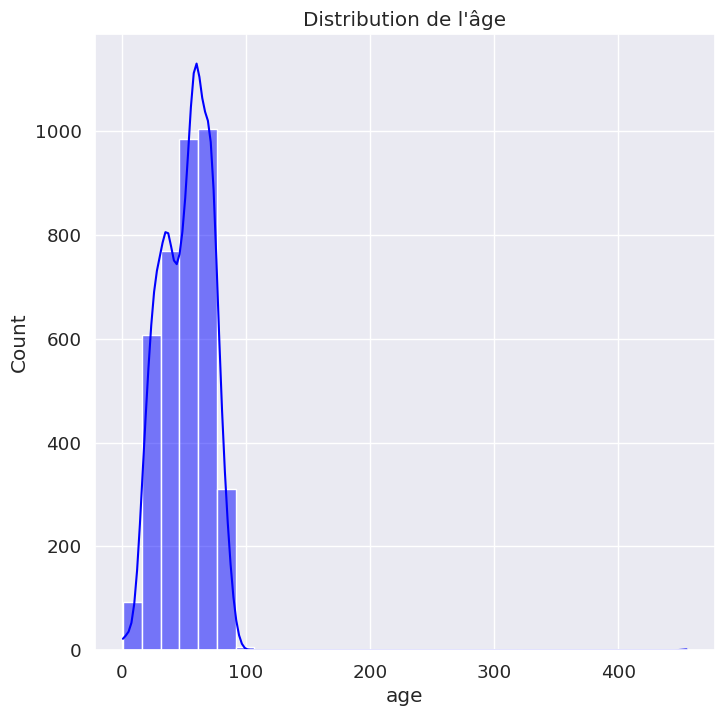

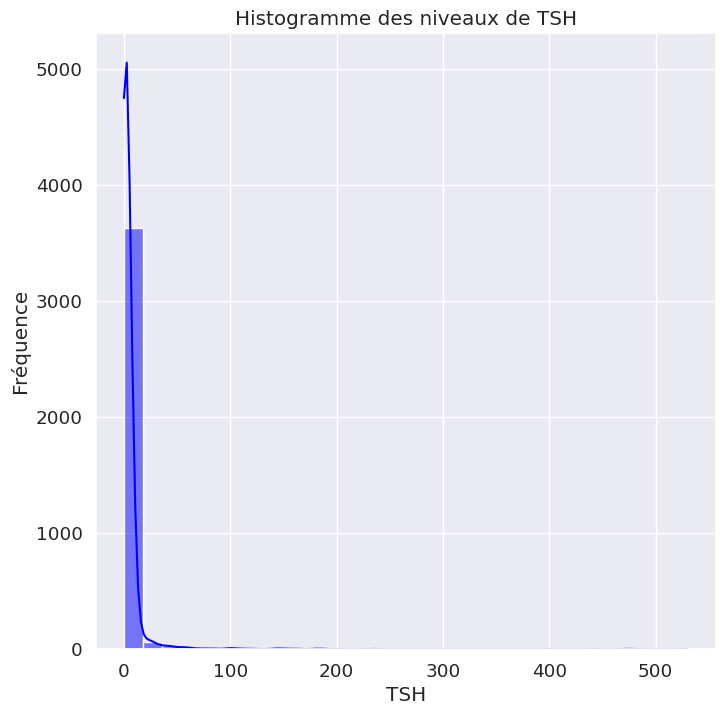

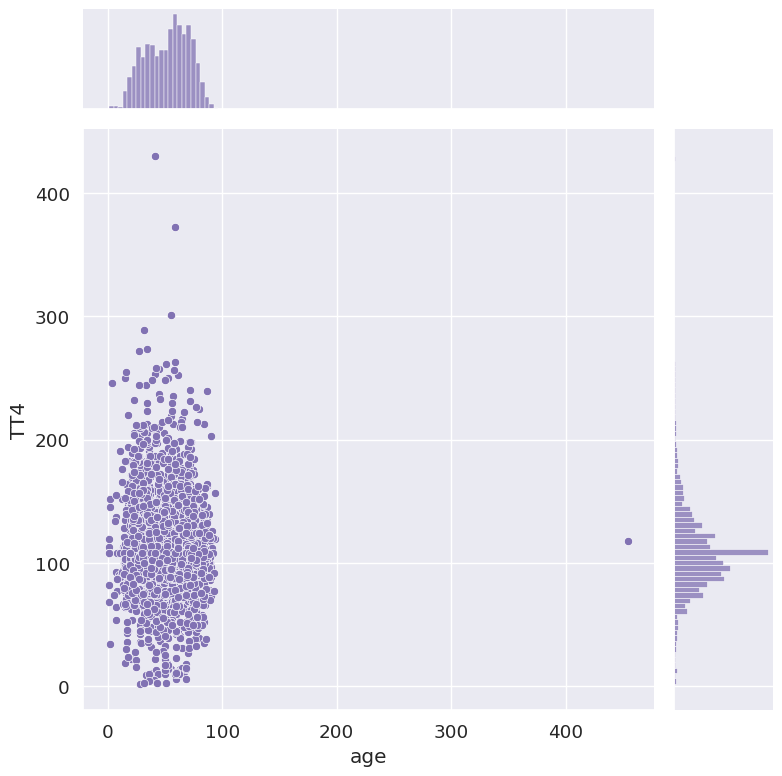

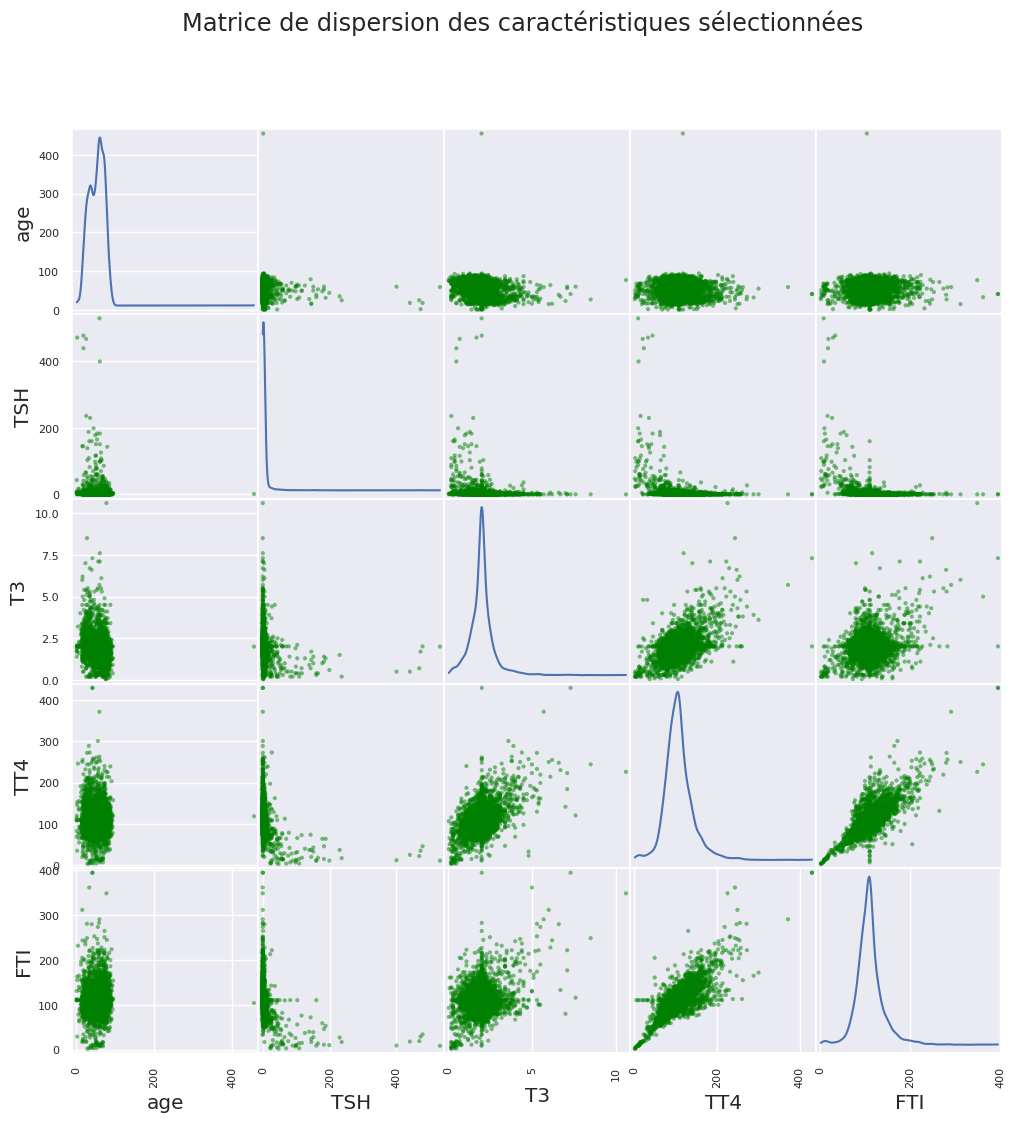

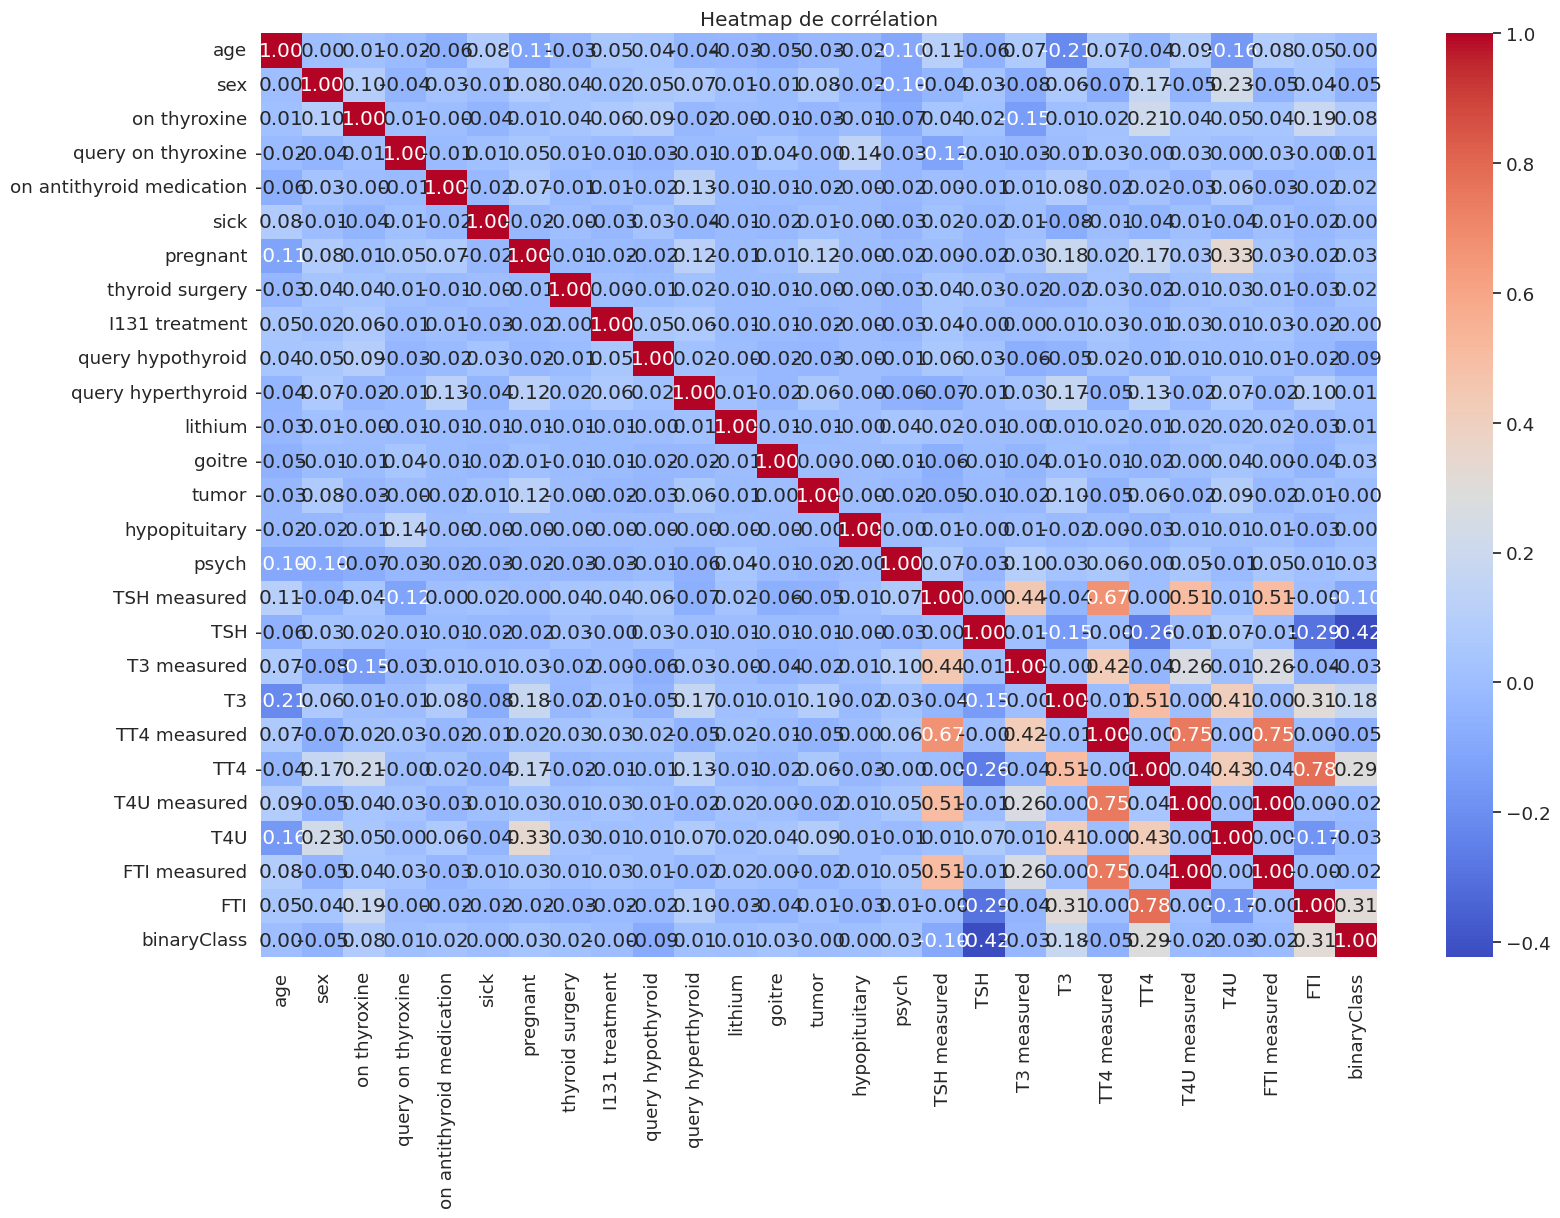


Types de colonnes après nettoyage :
age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
b

In [10]:


%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

# Chargement des données
data = pd.read_csv('hypothyroid.csv')

# Suppression de la colonne 'TBG' et de 'TBG measured' si elle existe
if 'TBG' in data.columns:
    del data['TBG']
if 'TBG measured' in data.columns:
    del data['TBG measured']
if 'referral source' in data.columns:
    del data['referral source']


# Aperçu des données
print("Aperçu des premières lignes :")
print(data.head())

# Information sur le dataset (colonnes, types, valeurs manquantes)
print("\nInformation sur le dataset :")
print(data.info())

# Résumé statistique des colonnes numériques
print("\nRésumé statistique :")
print(data.describe().T)

# Remplacement explicite des valeurs
data.replace({"t": 1, "f": 0, "M": 0, "F": 1, "?": np.nan}, inplace=True)

# Conversion des colonnes numériques
numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Correction de la colonne cible
if 'binaryClass' in data.columns:
    data['binaryClass'] = data['binaryClass'].map({'P': 1, 'N': 0})

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='mean')
for col in numeric_columns:
    data[col] = imputer.fit_transform(data[[col]])

data['sex'] = data['sex'].fillna(data['sex'].mean())

# Supprimer la colonne inutile 'referral source'
if 'referral source' in data.columns:
    del data['referral source']

# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(data.isnull().sum())

# Distribution des colonnes sélectionnées
sns.histplot(data['age'], color='blue', bins=30, kde=True)
plt.title('Distribution de l\'âge')
plt.show()

# Distribution de 'TSH'
sns.histplot(data['TSH'], bins=30, kde=True, color='blue')
plt.title('Histogramme des niveaux de TSH')
plt.xlabel('TSH')
plt.ylabel('Fréquence')
plt.show()

# Jointplot entre l'âge et TT4
sns.jointplot(x='age', y='TT4', data=data, kind='scatter', height=8, color='m')
plt.show()

# Matrice de dispersion
scatter_matrix(data[['age', 'TSH', 'T3', 'TT4', 'FTI']], figsize=(12, 12), diagonal='kde', color='green')
plt.suptitle('Matrice de dispersion des caractéristiques sélectionnées')
plt.show()

# Heatmap de corrélation
plt.figure(figsize=(18, 12))
corr = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap de corrélation')
plt.show()

# Vérification finale des types de colonnes
print("\nTypes de colonnes après nettoyage :")
print(data.dtypes)


In [11]:
variables_cles = ['TSH', 'T3', 'TT4', 'FTI', 'T4U']
for var in variables_cles:
    data = detect_outliers(data, var)

258 outliers détectés dans la colonne TSH.
456 outliers détectés dans la colonne T3.
215 outliers détectés dans la colonne TT4.
277 outliers détectés dans la colonne FTI.
205 outliers détectés dans la colonne T4U.


In [12]:
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,binaryClass
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1.300000,1,2.5000,1,125.000000,1,1.140,1,109.000000,1
1,23.0,1.0,0,0,0,0,0,0,0,0,...,4.100000,1,2.0000,1,102.000000,0,0.995,0,110.469649,1
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0.980000,0,2.0135,1,109.000000,1,0.910,1,120.000000,1
3,70.0,1.0,1,0,0,0,0,0,0,0,...,0.160000,1,1.9000,1,175.000000,0,0.995,0,110.469649,1
4,70.0,1.0,0,0,0,0,0,0,0,0,...,0.720000,1,1.2000,1,61.000000,1,0.870,1,70.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.0,0,0,0,0,0,0,0,0,...,5.086766,0,2.0135,0,108.319345,0,0.995,0,110.469649,1
3768,68.0,1.0,0,0,0,0,0,0,0,0,...,1.000000,1,2.1000,1,124.000000,1,1.080,1,114.000000,1
3769,74.0,1.0,0,0,0,0,0,0,0,0,...,5.100000,1,1.8000,1,112.000000,1,1.070,1,105.000000,1
3770,72.0,0.0,0,0,0,0,0,0,0,0,...,0.700000,1,2.0000,1,82.000000,1,0.940,1,87.000000,1


## Modeling

We train deep learning models on the cleaned data. This involves selecting architectures, training the models,
and optimizing their performance.


In [13]:
# ==================== PRÉTRAITEMENT DES DONNÉES ====================
# Gérer les valeurs manquantes
imputer = SimpleImputer(strategy='mean')
X = data.drop('binaryClass', axis=1)
y = data['binaryClass']
X_imputed = imputer.fit_transform(X)

# Standardisation
def preprocess_data(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, stratify=y, random_state=42
    )
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess_data(X_imputed, y)


In [14]:
def train_model_rfe():
    print("Entraînement du modèle de régression logistique avec RFE...")
    model_rfe = LogisticRegression(max_iter=1000)
    rfe = RFE(model_rfe, n_features_to_select=10)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    model_rfe.fit(X_train_rfe, y_train)
    y_pred_rfe = model_rfe.predict(X_test_rfe)
    print("=== Régression Logistique avec RFE ===")
    print(classification_report(y_test, y_pred_rfe))
    print(confusion_matrix(y_test, y_pred_rfe))
    return model_rfe, rfe, X_train_rfe, X_test_rfe

def train_logistic_with_gridsearch(X_train_rfe, y_train):
    print("Recherche d'hyperparamètres avec GridSearchCV pour la régression logistique...")
    param_grid_logistic = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['saga'],
        'l1_ratio': [0.25, 0.5, 0.75]
    }
    grid_search_logistic = GridSearchCV(
        estimator=LogisticRegression(random_state=42, max_iter=10000),
        param_grid=param_grid_logistic,
        cv=5,
        scoring='f1_weighted',
        verbose=1,
        n_jobs=-1,
        refit=True
    )
    grid_search_logistic.fit(X_train_rfe, y_train)
    print("Meilleurs paramètres pour la régression logistique :", grid_search_logistic.best_params_)
    print("Meilleure performance :", grid_search_logistic.best_score_)
    return grid_search_logistic.best_estimator_

def train_random_forest():
    print("Entraînement du modèle Random Forest...")
    param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    grid_search_rf = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42),
        param_grid=param_grid_rf,
        cv=5,
        scoring='f1_weighted',
        verbose=1,
        n_jobs=-1,
        refit=True
    )
    grid_search_rf.fit(X_train, y_train)
    print("Meilleurs paramètres pour Random Forest :", grid_search_rf.best_params_)
    print("Meilleure performance :", grid_search_rf.best_score_)
    y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
    print("=== Random Forest ===")
    print(classification_report(y_test, y_pred_rf))
    print(confusion_matrix(y_test, y_pred_rf))
    return grid_search_rf.best_estimator_

def train_custom_keras_model():
    print("Entraînement du modèle personnalisé Keras...")
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        verbose=1
    )
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    print("=== Modèle Personnalisé Keras ===")
    print(classification_report(y_test, y_pred))
    return model

def train_model_with_early_stopping():
    print("Entraînement d'un réseau de neurones personnalisé avec EarlyStopping...")
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
    model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=[early_stop],
        verbose=1
    )
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    print("=== Modèle avec EarlyStopping ===")
    print(classification_report(y_test, y_pred))
    return model

# Entraînement des modèles
model_rfe, rfe, X_train_rfe, X_test_rfe = train_model_rfe()
logistic_grid_model = train_logistic_with_gridsearch(X_train_rfe, y_train)
random_forest_model = train_random_forest()
model_custom = train_custom_keras_model()
model_with_early_stopping = train_model_with_early_stopping()


Entraînement du modèle de régression logistique avec RFE...
=== Régression Logistique avec RFE ===
              precision    recall  f1-score   support

           0       0.94      0.59      0.72        58
           1       0.97      1.00      0.98       697

    accuracy                           0.97       755
   macro avg       0.96      0.79      0.85       755
weighted avg       0.96      0.97      0.96       755

[[ 34  24]
 [  2 695]]
Recherche d'hyperparamètres avec GridSearchCV pour la régression logistique...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Meilleurs paramètres pour la régression logistique : {'C': 10, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
Meilleure performance : 0.9673189339710746
Entraînement du modèle Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Meilleurs paramètres pour Random Forest : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Meilleure pe

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.8680 - loss: 0.3909 - val_accuracy: 0.9272 - val_loss: 0.1988
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9352 - loss: 0.2140 - val_accuracy: 0.9404 - val_loss: 0.1651
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9522 - loss: 0.1491 - val_accuracy: 0.9421 - val_loss: 0.1498
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9525 - loss: 0.1343 - val_accuracy: 0.9487 - val_loss: 0.1323
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9541 - loss: 0.1277 - val_accuracy: 0.9487 - val_loss: 0.1281
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9535 - loss: 0.1198 - val_accuracy: 0.9570 - val_loss: 0.1120
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9586 - loss: 0.1088 - val_accuracy: 0.9553 - val_loss: 0.1018
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9694 - loss: 0.1014 - val_accuracy: 0.9520 - val_loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.8095 - loss: 0.4546 - val_accuracy: 0.9222 - val_loss: 0.2194
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9436 - loss: 0.1859 - val_accuracy: 0.9387 - val_loss: 0.1727
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9577 - loss: 0.1449 - val_accuracy: 0.9404 - val_loss: 0.1526
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9536 - loss: 0.1450 - val_accuracy: 0.9404 - val_loss: 0.1468
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9622 - loss: 0.1233 - val_accuracy: 0.9470 - val_loss: 0.1296
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9618 - loss: 0.1128 - val_accuracy: 0.9470 - val_loss: 0.1237
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9596 - loss: 0.1080 - val_accuracy: 0.9570 - val_loss: 0.1076
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9652 - loss: 0.0940 - val_accuracy: 0.9619 - val_loss: 0.

In [15]:
# ==================== SAUVEGARDE DU MODÈLE ====================
import joblib
joblib.dump(model_rfe, 'logistic_model_rfe.pkl')
print("Modèle de régression logistique avec RFE sauvegardé sous 'logistic_model_rfe.pkl'.")
joblib.dump(logistic_grid_model, 'logistic_grid_model.pkl')
print("Modèle GridSearch Logistic sauvegardé sous 'logistic_grid_model.pkl'.")
joblib.dump(random_forest_model, 'random_forest_model.pkl')
print("Modèle Random Forest sauvegardé sous 'random_forest_model.pkl'.")
joblib.dump(model_custom, 'keras_model.pkl')
print("Modèle KerasWrapper sauvegardé sous 'keras_model.pkl'.")
model_with_early_stopping.save('early_stopping_model.h5')
print("Modèle avec EarlyStopping sauvegardé sous 'early_stopping_model.h5'.")

Modèle de régression logistique avec RFE sauvegardé sous 'logistic_model_rfe.pkl'.
Modèle GridSearch Logistic sauvegardé sous 'logistic_grid_model.pkl'.


Modèle Random Forest sauvegardé sous 'random_forest_model.pkl'.
Modèle KerasWrapper sauvegardé sous 'keras_model.pkl'.
Modèle avec EarlyStopping sauvegardé sous 'early_stopping_model.h5'.


In [16]:

def train_model_rfe():
    print("Entraînement du modèle de régression logistique avec RFE...")
    model_rfe = LogisticRegression(max_iter=1000)
    rfe = RFE(model_rfe, n_features_to_select=10)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    model_rfe.fit(X_train_rfe, y_train)
    y_pred_rfe = model_rfe.predict(X_test_rfe)
    print("=== Régression Logistique avec RFE ===")
    print(classification_report(y_test, y_pred_rfe))
    print(confusion_matrix(y_test, y_pred_rfe))
    return model_rfe, rfe, X_train_rfe, X_test_rfe

def train_logistic_with_gridsearch(X_train_rfe, y_train):
    print("Recherche d'hyperparamètres avec GridSearchCV pour la régression logistique...")
    param_grid_logistic = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['saga'],
        'l1_ratio': [0.25, 0.5, 0.75]
    }
    grid_search_logistic = GridSearchCV(
        estimator=LogisticRegression(random_state=42, max_iter=10000),
        param_grid=param_grid_logistic,
        cv=5,
        scoring='f1_weighted',
        verbose=1,
        n_jobs=-1,
        refit=True
    )
    grid_search_logistic.fit(X_train_rfe, y_train)
    print("Meilleurs paramètres pour la régression logistique :", grid_search_logistic.best_params_)
    print("Meilleure performance :", grid_search_logistic.best_score_)
    return grid_search_logistic.best_estimator_

def train_random_forest():
    print("Entraînement du modèle Random Forest...")
    param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    grid_search_rf = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42),
        param_grid=param_grid_rf,
        cv=5,
        scoring='f1_weighted',
        verbose=1,
        n_jobs=-1,
        refit=True
    )
    grid_search_rf.fit(X_train, y_train)
    print("Meilleurs paramètres pour Random Forest :", grid_search_rf.best_params_)
    print("Meilleure performance :", grid_search_rf.best_score_)
    y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
    print("=== Random Forest ===")
    print(classification_report(y_test, y_pred_rf))
    print(confusion_matrix(y_test, y_pred_rf))
    return grid_search_rf.best_estimator_

def train_custom_keras_model():
    print("Entraînement du modèle personnalisé Keras...")
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        verbose=1
    )
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    print("=== Modèle Personnalisé Keras ===")
    print(classification_report(y_test, y_pred))
    return model

def train_model_with_early_stopping():
    print("Entraînement d'un réseau de neurones personnalisé avec EarlyStopping...")
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
    model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=[early_stop],
        verbose=1
    )
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    print("=== Modèle avec EarlyStopping ===")
    print(classification_report(y_test, y_pred))
    return model

# Entraînement des modèles
model_rfe, rfe, X_train_rfe, X_test_rfe = train_model_rfe()
logistic_grid_model = train_logistic_with_gridsearch(X_train_rfe, y_train)
random_forest_model = train_random_forest()
model_custom = train_custom_keras_model()
model_with_early_stopping = train_model_with_early_stopping()

# ==================== COMPARAISON DES MODÈLES ====================
def evaluate_models():
    results = []

    # Régression Logistique avec RFE
    y_pred_rfe = model_rfe.predict(X_test_rfe)
    results.append({
        'Model': 'Logistic Regression with RFE',
        'F1 Score': f1_score(y_test, y_pred_rfe, average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred_rfe)
    })

    # GridSearch Logistic
    y_pred_logistic = logistic_grid_model.predict(X_test_rfe)
    results.append({
        'Model': 'Logistic Regression with GridSearch',
        'F1 Score': f1_score(y_test, y_pred_logistic, average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred_logistic)
    })

    # Random Forest
    y_pred_rf = random_forest_model.predict(X_test)
    results.append({
        'Model': 'Random Forest',
        'F1 Score': f1_score(y_test, y_pred_rf, average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred_rf)
    })

    # Modèle Keras Personnalisé
    y_pred_custom = (model_custom.predict(X_test) > 0.5).astype(int)
    results.append({
        'Model': 'Custom Keras Model',
        'F1 Score': f1_score(y_test, y_pred_custom, average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred_custom)
    })

    # Modèle avec EarlyStopping
    y_pred_early_stopping = (model_with_early_stopping.predict(X_test) > 0.5).astype(int)
    results.append({
        'Model': 'Keras Model with EarlyStopping',
        'F1 Score': f1_score(y_test, y_pred_early_stopping, average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred_early_stopping)
    })

    # Convertir les résultats en DataFrame pour affichage
    results_df = pd.DataFrame(results)
    best_model = results_df.sort_values(by='F1 Score', ascending=False).iloc[0]
    print("\n=== Résultats Comparatifs ===")
    print(results_df)
    print("\nMeilleur modèle :", best_model['Model'])
    return results_df

# Comparaison des modèles
comparison_df = evaluate_models()


Entraînement du modèle de régression logistique avec RFE...
=== Régression Logistique avec RFE ===
              precision    recall  f1-score   support

           0       0.94      0.59      0.72        58
           1       0.97      1.00      0.98       697

    accuracy                           0.97       755
   macro avg       0.96      0.79      0.85       755
weighted avg       0.96      0.97      0.96       755

[[ 34  24]
 [  2 695]]
Recherche d'hyperparamètres avec GridSearchCV pour la régression logistique...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Meilleurs paramètres pour la régression logistique : {'C': 10, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
Meilleure performance : 0.9673189339710746
Entraînement du modèle Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Meilleurs paramètres pour Random Forest : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Meilleure pe

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8863 - loss: 0.3672 - val_accuracy: 0.9222 - val_loss: 0.2044
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9323 - loss: 0.2160 - val_accuracy: 0.9354 - val_loss: 0.1775
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9470 - loss: 0.1643 - val_accuracy: 0.9421 - val_loss: 0.1543
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9537 - loss: 0.1329 - val_accuracy: 0.9487 - val_loss: 0.1402
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9541 - loss: 0.1274 - val_accuracy: 0.9487 - val_loss: 0.1309
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9570 - loss: 0.1275 - val_accuracy: 0.9487 - val_loss: 0.1285
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9545 - loss: 0.1119 - val_accuracy: 0.9553 - val_loss: 0.1141
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9707 - loss: 0.0959 - val_accuracy: 0.9619 - val_loss: 0.0961
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9229 - loss: 0.3532 - val_accuracy: 0.9288 - val_loss: 0.1999
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9474 - loss: 0.1730 - val_accuracy: 0.9387 - val_loss: 0.1729
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9489 - loss: 0.1530 - val_accuracy: 0.9454 - val_loss: 0.1512
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9557 - loss: 0.1322 - val_accuracy: 0.9437 - val_loss: 0.1439
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9438 - loss: 0.1471 - val_accuracy: 0.9487 - val_loss: 0.1295
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9605 - loss: 0.1047 - val_accuracy: 0.9553 - val_loss: 0.1151
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9614 - loss: 0.1138 - val_accuracy: 0.9536 - val_loss: 0.1141
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9655 - loss: 0.0966 - val_accuracy: 0.9553 - val_loss: 0.

## Evaluation

Finally, we evaluate the models using metrics such as accuracy, precision, recall, and F1-score.
This helps us understand the performance of our approach and identify areas for improvement.


In [17]:
# Meilleur modèle désigné automatiquement
best_model_name = comparison_df.sort_values(by='F1 Score', ascending=False).iloc[0]['Model']
print(f"Meilleur modèle identifié : {best_model_name}")

if best_model_name == 'Random Forest':
    best_model = random_forest_model
elif best_model_name == 'Logistic Regression with RFE':
    best_model = model_rfe
elif best_model_name == 'Logistic Regression with GridSearch':
    best_model = logistic_grid_model
elif best_model_name == 'Custom Keras Model':
    best_model = model_custom
elif best_model_name == 'Keras Model with EarlyStopping':
    best_model = model_with_early_stopping
else:
    raise ValueError("Modèle inconnu détecté comme meilleur.")

# Évaluation sur l'ensemble de validation
if best_model_name in ['Random Forest', 'Logistic Regression with RFE', 'Logistic Regression with GridSearch']:
    y_pred_val = best_model.predict(X_test)
else:
    y_pred_val = (best_model.predict(X_test) > 0.5).astype(int)

print("Résultats sur l'ensemble de test :")
print(classification_report(y_test, y_pred_val))
print(confusion_matrix(y_test, y_pred_val))

# Sauvegarder le meilleur modèle
joblib.dump(best_model, 'best_model.pkl')
print("Meilleur modèle sauvegardé sous 'best_model.pkl'.")


Meilleur modèle identifié : Random Forest
Résultats sur l'ensemble de test :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      1.00      1.00       697

    accuracy                           1.00       755
   macro avg       0.99      1.00      1.00       755
weighted avg       1.00      1.00      1.00       755

[[ 58   0]
 [  1 696]]
Meilleur modèle sauvegardé sous 'best_model.pkl'.


In [18]:
# Vérification si best_model existe
try:
    best_model
except NameError:
    print("Le modèle n'existe pas. Chargement du modèle sauvegardé.")
    from tensorflow.keras.models import load_model
    best_model = load_model('best_model.pkl')


Accuracy sur les données de test: 99.87%
Rapport de Classification:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      1.00      1.00       697

    accuracy                           1.00       755
   macro avg       0.99      1.00      1.00       755
weighted avg       1.00      1.00      1.00       755

Matrice de Confusion:
[[ 58   0]
 [  1 696]]


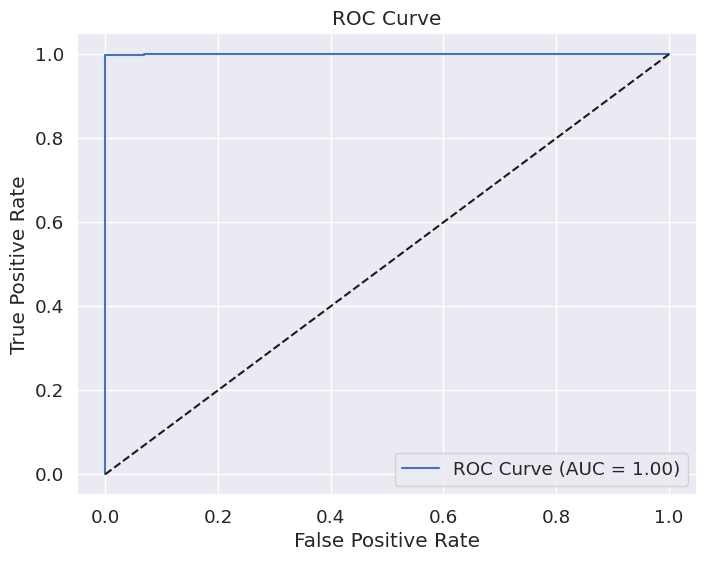

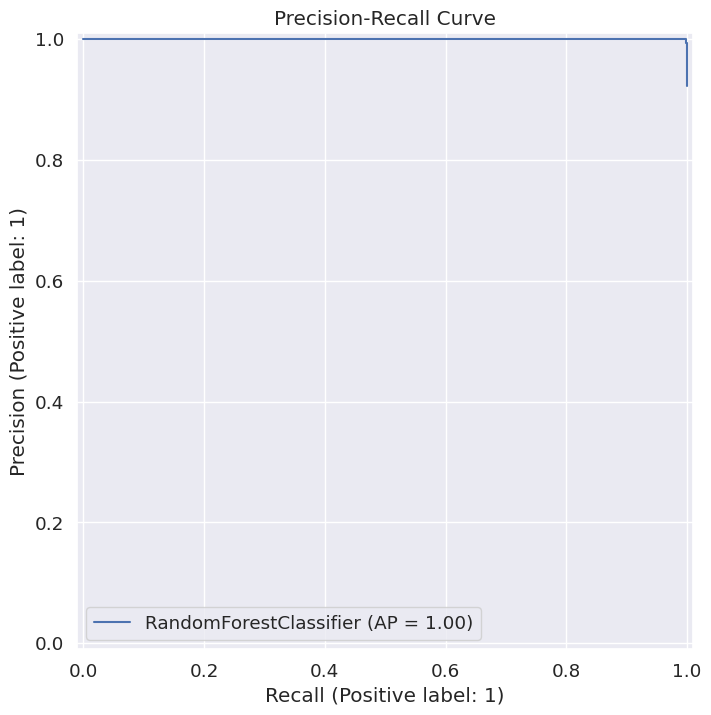

In [19]:
# Évaluation de compatibilité Scikit-learn
try:
    if hasattr(best_model, 'score'):  # Modèles Scikit-learn
        accuracy = best_model.score(X_test, y_test)
        print(f"Accuracy sur les données de test: {accuracy*100:.2f}%")

        # Prédictions
        y_pred = best_model.predict(X_test)
        if hasattr(best_model, 'predict_proba'):
            y_pred_prob = best_model.predict_proba(X_test)[:, 1]

        # Rapport de classification
        print("Rapport de Classification:")
        print(classification_report(y_test, y_pred))

        # Matrice de Confusion
        print("Matrice de Confusion:")
        print(confusion_matrix(y_test, y_pred))

        # Courbes ROC et Précision-Rappel (si applicable)
        if 'y_pred_prob' in locals():
            from sklearn.metrics import roc_auc_score, roc_curve, PrecisionRecallDisplay
            roc_auc = roc_auc_score(y_test, y_pred_prob)
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve')
            plt.legend(loc='lower right')
            plt.show()

            PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test)
            plt.title('Precision-Recall Curve')
            plt.show()
    else:  # Modèles Keras
        y_pred = (best_model.predict(X_test) > 0.5).astype(int)
        print("Rapport de Classification:")
        print(classification_report(y_test, y_pred))
        print("Matrice de Confusion:")
        print(confusion_matrix(y_test, y_pred))
except AttributeError:
    print("Erreur : Modèle non compatible avec Scikit-learn ou non défini correctement.")


# Save the predictions.


In [20]:
# Sauvegarde des Prédictions
import pandas as pd
predictions_df = pd.DataFrame({
    'Valeurs Réelles': y_test,
    'Probabilité Prédite': y_pred_prob,
    'Classe Prédite': y_pred
})
predictions_df.to_csv('predictions.csv', index=False)
print("Prédictions sauvegardées dans 'predictions.csv'.")

Prédictions sauvegardées dans 'predictions.csv'.


In [21]:
# Standardisation avec noms de colonnes
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Sauvegarde du scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')
print("Scaler sauvegardé sous 'scaler.pkl'.")




Scaler sauvegardé sous 'scaler.pkl'.


In [22]:
# Chargement du scaler sauvegardé
scaler = joblib.load('scaler.pkl')


In [23]:
# Réentraînement du modèle RandomForest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Sauvegarde du modèle
joblib.dump(random_forest_model, 'random_forest_model.pkl')
print("Random Forest sauvegardé sous 'random_forest_model.pkl'.")


Random Forest sauvegardé sous 'random_forest_model.pkl'.


# Make some predictions

In [24]:
def predict_patient(patient_data):
    """Prédit la classe pour un patient donné."""
    import numpy as np
    import pandas as pd
    import joblib

    # Chargement des objets nécessaires
    scaler = joblib.load('scaler.pkl')

    best_model = joblib.load('best_model.pkl')  # Charger le meilleur modèle sauvegardé

    # Conversion en DataFrame avec les mêmes colonnes que X
    patient_df = pd.DataFrame([patient_data])
    patient_df = patient_df.reindex(columns=X.columns, fill_value=0)

    # Prétraitement du patient
    patient_scaled = pd.DataFrame(scaler.transform(patient_df), columns=X.columns)
    if 'rfe' in locals():
        patient_rfe = rfe.transform(patient_scaled)
    else:
        patient_rfe = patient_scaled

    # Prédiction
    if hasattr(best_model, 'predict_proba'):  # Modèles Scikit-learn
        prediction_prob = best_model.predict_proba(patient_rfe)[:, 1][0]
        prediction_class = best_model.predict(patient_rfe)[0]
    else:  # Modèles Keras ou autres
        prediction_prob = best_model.predict(patient_scaled)[0][0]
        prediction_class = 1 if prediction_prob > 0.5 else 0

    # Résultat
    print(f"Probabilité de la maladie: {prediction_prob*100:.2f}%")
    print(f"Classe Prédite: {'Malade' if prediction_class == 1 else 'Non Malade'}")

nouveau_patient = {
    'age': 45,
    'sex': 1,  # 0 pour M, 1 pour F
    'on thyroxine': 0,
    'query on thyroxine': 0,
    'on antithyroid medication': 0,
    'sick': 1,
    'pregnant': 0,
    'thyroid surgery': 0,
    'I131 treatment': 0,
    'query hypothyroid': 0,
    'query hyperthyroid': 0,
    'lithium': 0,
    'goitre': 0,
    'tumor': 0,
    'hypopituitary': 0,
    'psych': 0,
    'TSH measured': 1,
    'TSH': 2.5,
    'T3 measured': 1,
    'T3': 1.2,
    'TT4 measured': 1,
    'TT4': 115.0,
    'T4U measured': 1,
    'T4U': 0.8,
    'FTI measured': 1,
    'FTI': 1.0
}

predict_patient(nouveau_patient)


Probabilité de la maladie: 74.71%
Classe Prédite: Malade


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [25]:
# Exemple de Données d'un Patient
patient_deux = {
    'age': 30,
    'sex': 0,
    'on thyroxine': 0,
    'query on thyroxine': 0,
    'on antithyroid medication': 0,
    'sick': 0,
    'pregnant': 0,
    'thyroid surgery': 0,
    'I131 treatment': 0,
    'query hypothyroid': 0,
    'query hyperthyroid': 0,
    'lithium': 0,
    'goitre': 0,
    'tumor': 0,
    'hypopituitary': 0,
    'psych': 0,
    'TSH measured': 1,
    'TSH': 1.5,  # Niveau normal
    'T3 measured': 1,
    'T3': 1.1,  # Niveau normal
    'TT4 measured': 1,
    'TT4': 110.0,  # Niveau normal
    'T4U measured': 1,
    'T4U': 0.9,  # Niveau normal
    'FTI measured': 1,
    'FTI': 1.2  # Niveau normal
}

predict_patient(patient_deux)


Probabilité de la maladie: 74.46%
Classe Prédite: Malade


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [26]:
nouveau_patient_malade = {
    'age': 7,
    'sex': 1,
    'on thyroxine': 1,
    'query on thyroxine': 1,
    'on antithyroid medication': 1,
    'sick': 1,
    'pregnant': 0,
    'thyroid surgery': 1,
    'I131 treatment': 1,
    'query hypothyroid': 1,
    'query hyperthyroid': 0,
    'lithium': 0,
    'goitre': 1,
    'tumor': 1,
    'hypopituitary': 0,
    'psych': 1,
    'TSH measured': 1,
    'TSH': 48.0,
    'T3 measured': 0,
    'T3': 0.1,
    'TT4 measured': 0,
    'TT4': 59.0,
    'T4U measured': 0,
    'T4U': 0.14,
    'FTI measured': 1,
    'FTI': 87.0
}

predict_patient(nouveau_patient_malade)


Probabilité de la maladie: 72.12%
Classe Prédite: Malade


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [27]:
print(f"Modèle chargé : {type(best_model)}")


Modèle chargé : <class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [28]:
import numpy as np
import pandas as pd

y_train_series = pd.Series(y_train)


print(y_train_series.value_counts())

binaryClass
1    2784
0     233
Name: count, dtype: int64


In [29]:

print("Vérification de l'état du modèle et des données")
print(f"Modèle chargé : {type(best_model)}")
print(f"Nombre de données d'entraînement : {len(X_train)}")
print(f"Répartition des classes :\n{pd.Series(y_train).value_counts()}")
print("Test de Prédiction sur l'Ensemble de Test")

try:
    if hasattr(best_model, 'n_features_in_') and best_model.n_features_in_ == X_test_rfe.shape[1]:
        sample_test_rfe = X_test_rfe[:5]
        sample_test_pred = best_model.predict(sample_test_rfe)
        if hasattr(best_model, 'predict_proba'):
            sample_test_prob = best_model.predict_proba(sample_test_rfe)[:, 1]
        else:
            sample_test_prob = None
    elif hasattr(best_model, 'n_features_in_') and best_model.n_features_in_ == X_test.shape[1]:
        sample_test_scaled = X_test[:5]
        sample_test_pred = best_model.predict(sample_test_scaled)
        if hasattr(best_model, 'predict_proba'):
            sample_test_prob = best_model.predict_proba(sample_test_scaled)[:, 1]
        else:
            sample_test_prob = None
    else:
        raise ValueError("Le nombre de caractéristiques d'entrée ne correspond pas à ce que le modèle attend.")
except ValueError as e:
    print(f"Erreur : {e}")
    sample_test_pred = None
    sample_test_prob = None

# Affichage des prédictions et probabilités
if sample_test_pred is not None:
    print(f"Prédictions de Test : {sample_test_pred}")
    if sample_test_prob is not None:
        print(f"Probabilités de Test : {sample_test_prob}")
    else:
        print("Le modèle ne supporte pas predict_proba. Aucune probabilité affichée.")
else:
    print("Impossible d'effectuer une prédiction en raison d'une erreur.")


Vérification de l'état du modèle et des données
Modèle chargé : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Nombre de données d'entraînement : 3017
Répartition des classes :
binaryClass
1    2784
0     233
Name: count, dtype: int64
Test de Prédiction sur l'Ensemble de Test
Prédictions de Test : [1 1 1 1 1]
Probabilités de Test : [0.99746032 1.         0.99722222 1.         1.        ]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
